In [47]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection  import train_test_split

plt.rcParams['figure.figsize'] = (20, 14)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

%matplotlib inline

In [9]:
#import cleaned csv
logs=pd.read_csv('Data_Cleaned.csv', index_col=0)

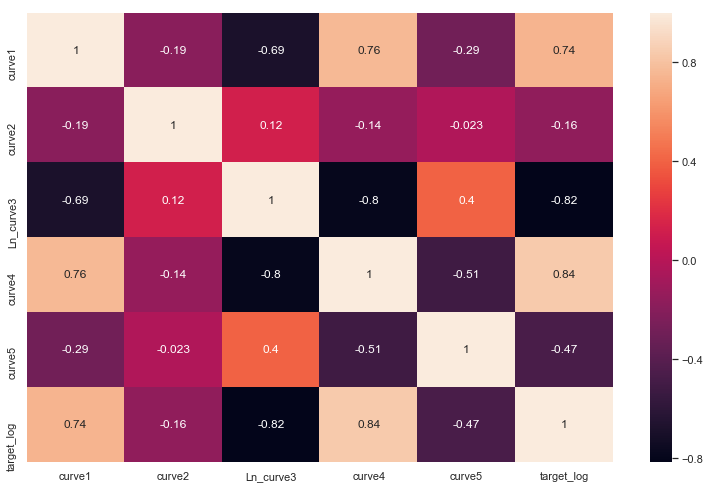

In [10]:
logs_pair=logs[['curve1','curve2','Ln_curve3','curve4','curve5','target_log']]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(logs_pair.corr(),annot=True)

In [11]:
logs[:26].head()
logs.dropna(inplace=True)
logs.nunique()

Observation_Num           335214
UWI_PROXY                     81
depth                      12980
curve1                    114164
curve2                       357
curve3                     52551
curve4                       561
curve5                       963
target_log                 60222
curve1_diff                52184
curve3_diff                39969
curve4_diff                  853
curve5_diff                  940
Target_diff                21944
curve1_diff_2nd            72310
curve3_diff_2nd            44530
curve4_diff_2nd             1746
curve5_diff_2nd             1926
Target_diff_2nd            33584
Roll_curve1_diff_2nd      334819
Roll_curve3_diff_2nd      330924
Roll_curve4_diff_2nd      291271
Roll_curve5_diff_2nd      318810
Roll_Target_diff_2nd      333539
Roll20_curve1_diff_2nd    334912
Roll20_curve1             335084
Ln_curve3                  52551
Cluster                        5
cluster_0                      2
cluster_1                      2
cluster_2 

In [12]:
#### Find Null RMSE #####
#instantiate linreg
linreg1 = LinearRegression()
#build X,y for getting null RMSE
feature_cols1 =['curve1','Ln_curve3','curve4','curve5']
X=logs[feature_cols1]
y=logs.target_log
# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
# Create a NumPy array with the same shape as y_test.
y_null = np.zeros_like(y_test, dtype=float)
# Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())
# Compute null RMSE.
print('NULL RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_null)))
print('NULL MSE:', metrics.mean_squared_error(y_test, y_null))
print('NULL MAE:', metrics.mean_absolute_error(y_test,y_null))

NULL RMSE: 14.69513560460371
NULL MSE: 215.94701043769166
NULL MAE: 11.397585211133643


In [13]:
def train_test_fit(df, feature_cols):
    X = df[feature_cols]
    y = df.target_log
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return ['-'.join(feature_cols), np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.mean_squared_error(y_test, y_pred), metrics.mean_absolute_error(y_test,y_pred), metrics.r2_score(y_test,y_pred)]

In [15]:
#Build Data Frame with all model results
frames=pd.DataFrame([
    pd.Series(train_test_fit(logs, ['curve1', 'curve3', 'curve4', 'curve5'])),
    pd.Series(train_test_fit(logs, ['curve1', 'Ln_curve3', 'curve4', 'curve5'])),
    pd.Series(train_test_fit(logs, ['curve1', 'Ln_curve3', 'curve5'])),
    pd.Series(train_test_fit(logs, ['curve1', 'curve5'])),
    pd.Series(train_test_fit(logs, ['curve1', 'Ln_curve3','curve4','curve5','Roll20_curve1'])),
    pd.Series(train_test_fit(logs, ['curve1', 'Ln_curve3','curve4','curve5','Roll20_curve1','Roll20_curve1_diff_2nd'])),
    pd.Series(train_test_fit(logs, ['curve1', 'Ln_curve3','curve4','curve5','Roll20_curve1_diff_2nd'])),
    pd.Series(train_test_fit(logs, ['curve1', 'Ln_curve3'])),
    pd.Series(train_test_fit(logs, ['curve1', 'Ln_curve3','curve4'])),
    pd.Series(train_test_fit(logs, ['curve4', 'Ln_curve3','curve5'])),
    pd.Series(train_test_fit(logs, ['curve1', 'curve4','curve5'])),
    pd.Series(train_test_fit(logs, ['curve4'])),
    pd.Series(train_test_fit(logs, ['curve1'])),
    pd.Series(train_test_fit(logs, ['curve1', 'Ln_curve3', 'curve4', 'curve5', 'curve5_diff'])),
    pd.Series(train_test_fit(logs, ['curve3', 'curve4_diff_2nd', 'Roll20_curve1_diff_2nd', 'curve5', 'Roll_curve5_diff_2nd', 'curve5_diff', 'curve2', 'Roll20_curve1', 'curve1', 'curve1_diff', 'Ln_curve3', 'curve4'])),
    pd.Series(train_test_fit(logs, ['curve1', 'Ln_curve3','curve4','curve5','cluster_1','cluster_2','cluster_3','cluster_4','Roll20_curve1'])),
    pd.Series(train_test_fit(logs, ['curve1', 'Ln_curve3','curve4','curve5','cluster_1','cluster_2','cluster_3','cluster_4','Roll20_curve1_diff_2nd'])),
    pd.Series(train_test_fit(logs, ['curve1', 'Ln_curve3','curve4','curve5','cluster_1','cluster_2','cluster_3','cluster_4','Roll20_curve1','Roll20_curve1_diff_2nd'])),
    pd.Series(train_test_fit(logs, ['curve1', 'Ln_curve3','curve4','curve5','cluster_1','cluster_2','cluster_3','cluster_4'])),
    pd.Series(train_test_fit(logs, ['curve1', 'Ln_curve3','curve4','curve5','Roll20_curve1','Roll20_curve1_diff_2nd'])),
])

In [16]:
#Name Columns and Sort by lowest RMSE
frames.columns=['Features','RMSE','MSE','ASE','R2']
frames.sort_values('RMSE')

,Features,RMSE,MSE,ASE,R2
15,curve1-Ln_curve3-curve4-curve5-cluster_1-clust...,6.242694,38.971229,4.432320,0.819640
17,curve1-Ln_curve3-curve4-curve5-cluster_1-clust...,6.242753,38.971960,4.433328,0.819637
16,curve1-Ln_curve3-curve4-curve5-cluster_1-clust...,6.245418,39.005248,4.434723,0.819483
18,curve1-Ln_curve3-curve4-curve5-cluster_1-clust...,6.246854,39.023186,4.433551,0.819400
14,curve3-curve4_diff_2nd-Roll20_curve1_diff_2nd-...,6.702098,44.918118,4.660445,0.792118
13,curve1-Ln_curve3-curve4-curve5-curve5_diff,6.822606,46.547953,4.775340,0.784575
19,curve1-Ln_curve3-curve4-curve5-Roll20_curve1-R...,6.825881,46.592649,4.782499,0.784368
5,curve1-Ln_curve3-curve4-curve5-Roll20_curve1-R...,6.825881,46.592649,4.782499,0.784368
4,curve1-Ln_curve3-curve4-curve5-Roll20_curve1,6.826275,46.598025,4.781496,0.784343
6,curve1-Ln_curve3-curve4-curve5-Roll20_curve1_d...,6.832451,46.682388,4.785482,0.783953


In [26]:
#Check VIF Factors (used code from (https://etav.github.io/python/vif_factor_python.html))
feature_cols_vif=['curve1', 'Ln_curve3', 'curve4', 'curve5']
X=logs[feature_cols_vif]
y=logs.target_log
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,2.601364,curve1
1,2.842078,Ln_curve3
2,4.264304,curve4
3,1.406265,curve5


In [9]:
#Use standard scaler to scale all independant variables
scaler=StandardScaler()
logs_scaled=logs
logs_scaled[[ 'curve1','curve2','curve3','curve4','curve5',
             'curve1_diff','curve3_diff','curve4_diff','curve5_diff',
             'curve1_diff_2nd', 'curve3_diff_2nd','curve4_diff_2nd', 
             'curve5_diff_2nd', 'Roll_curve1_diff_2nd','Roll_curve3_diff_2nd', 
             'Roll_curve4_diff_2nd','Roll_curve5_diff_2nd','Roll20_curve1_diff_2nd',
             'Roll20_curve1','Ln_curve3']]=scaler.fit_transform(logs_scaled[['curve1','curve2','curve3','curve4','curve5','curve1_diff','curve3_diff','curve4_diff','curve5_diff','curve1_diff_2nd', 'curve3_diff_2nd','curve4_diff_2nd', 'curve5_diff_2nd', 'Roll_curve1_diff_2nd','Roll_curve3_diff_2nd', 'Roll_curve4_diff_2nd','Roll_curve5_diff_2nd','Roll20_curve1_diff_2nd','Roll20_curve1','Ln_curve3']])
logs_scaled.head()

,Observation_Num,UWI_PROXY,depth,curve1,curve2,curve3,curve4,curve5,target_log,curve1_diff,...,curve5_diff_2nd,Target_diff_2nd,Roll_curve1_diff_2nd,Roll_curve3_diff_2nd,Roll_curve4_diff_2nd,Roll_curve5_diff_2nd,Roll_Target_diff_2nd,Roll20_curve1_diff_2nd,Roll20_curve1,Ln_curve3
21,22,uwi1,7510.5,-0.464805,-0.574023,-0.165795,1.180393,0.976515,50.000,-0.559303,...,0.678606,27.328,-0.123399,-0.033078,-0.127800,-0.079999,133.373017,-0.194062,-0.275562,-0.492738
22,23,uwi1,7511.0,-0.493438,-0.504948,-0.165892,1.208776,0.552000,80.958,-0.432800,...,0.472312,64.592,-0.124521,-0.033078,-0.127800,-0.080395,753.417640,-0.194419,-0.275804,-0.497136
23,24,uwi1,7511.5,-0.565531,-0.067472,-0.165892,1.237158,0.417943,93.694,-0.069322,...,0.506694,18.222,-0.125352,-0.033078,-0.124671,-0.078909,646.029264,-0.195451,-0.276296,-0.497136
24,25,uwi1,7512.0,-0.605816,-0.620073,-0.165901,1.265541,0.507315,85.435,-0.335355,...,0.300400,20.995,-0.124907,-0.033078,-0.123419,-0.078909,504.704977,-0.196199,-0.277588,-0.497537
25,26,uwi1,7512.5,-0.612495,-0.597048,-0.165786,1.293924,0.596686,69.069,-0.616418,...,-0.387249,8.107,-0.125118,-0.033078,-0.122324,-0.074054,469.930625,-0.196304,-0.278523,-0.492340


In [10]:
#Build Data Frame with all model results
scaled_frames=pd.DataFrame([
    pd.Series(train_test_fit(logs_scaled, ['curve1', 'curve3', 'curve4', 'curve5'])),
    pd.Series(train_test_fit(logs_scaled, ['curve1', 'Ln_curve3', 'curve4', 'curve5'])),
    pd.Series(train_test_fit(logs_scaled, ['curve1', 'Ln_curve3', 'curve5'])),
    pd.Series(train_test_fit(logs_scaled, ['curve1', 'curve5'])),
    pd.Series(train_test_fit(logs_scaled, ['curve1', 'Ln_curve3','curve4','curve5','Roll20_curve1'])),
    pd.Series(train_test_fit(logs_scaled, ['curve1', 'Ln_curve3','curve4','curve5','Roll20_curve1','Roll20_curve1_diff_2nd'])),
    pd.Series(train_test_fit(logs_scaled, ['curve1', 'Ln_curve3','curve4','curve5','Roll20_curve1_diff_2nd'])),
    pd.Series(train_test_fit(logs_scaled, ['curve1', 'Ln_curve3'])),
    pd.Series(train_test_fit(logs_scaled, ['curve1', 'Ln_curve3','curve4'])),
    pd.Series(train_test_fit(logs_scaled, ['curve4', 'Ln_curve3','curve5'])),
    pd.Series(train_test_fit(logs_scaled, ['curve1', 'curve4','curve5'])),
    pd.Series(train_test_fit(logs_scaled, ['curve4'])),
    pd.Series(train_test_fit(logs_scaled, ['curve1'])),
    pd.Series(train_test_fit(logs_scaled, ['curve1', 'Ln_curve3', 'curve4', 'curve5', 'curve5_diff'])),
    pd.Series(train_test_fit(logs_scaled, ['curve3', 'curve4_diff_2nd', 'Roll20_curve1_diff_2nd', 'curve5', 'Roll_curve5_diff_2nd', 'curve5_diff', 'curve2', 'Roll20_curve1', 'curve1', 'curve1_diff', 'Ln_curve3', 'curve4'])),
])

In [11]:
#Name Columns and Sort by lowest RMSE
scaled_frames.columns=['Features','RMSE','MSE','ASE','R2']
scaled_frames.sort_values('RMSE')

,Features,RMSE,MSE,ASE,R2
14,curve3-curve4_diff_2nd-Roll20_curve1_diff_2nd-...,6.713484,45.070866,4.678099,0.791193
13,curve1-Ln_curve3-curve4-curve5-curve5_diff,6.836586,46.738906,4.794771,0.783465
5,curve1-Ln_curve3-curve4-curve5-Roll20_curve1-R...,6.841654,46.808235,4.802168,0.783144
4,curve1-Ln_curve3-curve4-curve5-Roll20_curve1,6.843190,46.829243,4.802329,0.783047
6,curve1-Ln_curve3-curve4-curve5-Roll20_curve1_d...,6.845760,46.864430,4.804247,0.782884
1,curve1-Ln_curve3-curve4-curve5,6.851402,46.941706,4.805677,0.782526
8,curve1-Ln_curve3-curve4,6.912142,47.777706,4.820330,0.778653
9,curve4-Ln_curve3-curve5,7.051681,49.726203,4.886044,0.769626
2,curve1-Ln_curve3-curve5,7.346229,53.967077,5.420168,0.749978
0,curve1-curve3-curve4-curve5,7.522192,56.583368,5.308521,0.737858


In [12]:
#Create function to test metrics of multiple models using scaled data
def train_test_ridge(df, feature_cols):
    X = df[feature_cols]
    y = df.target_log
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=123)
    
    
    ridge_alphas = np.logspace(0, 5, 200)

    optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
    optimal_ridge.fit(X_train, y_train)
    
    ridgereg = Ridge(alpha=optimal_ridge.alpha_)
    ridgereg.fit(X_train, y_train)
    
    y_pred = ridgereg.predict(X_test)
    return ['-'.join(feature_cols), np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.mean_squared_error(y_test, y_pred), metrics.mean_absolute_error(y_test,y_pred), metrics.r2_score(y_test,y_pred),optimal_ridge.alpha_]

In [16]:
#Build Data Frame with all model results for scaled data
ridge_frames=pd.DataFrame([
    pd.Series(train_test_ridge(logs_scaled, ['curve1', 'curve3', 'curve4', 'curve5'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve1', 'Ln_curve3', 'curve4', 'curve5'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve1', 'Ln_curve3', 'curve5'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve1', 'curve5'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve1', 'Ln_curve3','curve4','curve5','Roll20_curve1'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve1', 'Ln_curve3','curve4','curve5','Roll20_curve1','Roll20_curve1_diff_2nd'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve1', 'Ln_curve3','curve4','curve5','Roll20_curve1_diff_2nd'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve1', 'Ln_curve3'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve1', 'Ln_curve3','curve4'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve4', 'Ln_curve3','curve5'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve1', 'curve4','curve5'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve4'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve1'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve1', 'Ln_curve3', 'curve4', 'curve5', 'curve5_diff'])),
    pd.Series(train_test_ridge(logs_scaled, ['curve3', 'curve4_diff_2nd', 'Roll20_curve1_diff_2nd', 'curve5', 'Roll_curve5_diff_2nd', 'curve5_diff', 'curve2', 'Roll20_curve1', 'curve1', 'curve1_diff', 'Ln_curve3', 'curve4'])),
])

In [18]:
#Name Columns and Sort by lowest RMSE
ridge_frames.columns=['Features','RMSE','MSE','ASE','R2','alpha']
ridge_frames.sort_values('RMSE')

,Features,RMSE,MSE,ASE,R2,alpha
14,curve3-curve4_diff_2nd-Roll20_curve1_diff_2nd-...,6.713492,45.070976,4.678202,0.791193,40.554607
13,curve1-Ln_curve3-curve4-curve5-curve5_diff,6.836590,46.738961,4.794868,0.783465,38.274945
5,curve1-Ln_curve3-curve4-curve5-Roll20_curve1-R...,6.841660,46.808311,4.802273,0.783144,42.970047
4,curve1-Ln_curve3-curve4-curve5-Roll20_curve1,6.843195,46.829319,4.802435,0.783047,42.970047
6,curve1-Ln_curve3-curve4-curve5-Roll20_curve1_d...,6.845764,46.864481,4.804338,0.782884,36.123427
1,curve1-Ln_curve3-curve4-curve5,6.851405,46.941757,4.805770,0.782526,36.123427
8,curve1-Ln_curve3-curve4,6.912143,47.777723,4.820398,0.778653,24.094036
9,curve4-Ln_curve3-curve5,7.051685,49.726259,4.886146,0.769625,34.092851
2,curve1-Ln_curve3-curve5,7.346235,53.967172,5.420238,0.749978,30.367711
0,curve1-curve3-curve4-curve5,7.522195,56.583414,5.308608,0.737857,20.255019


In [21]:
#Use prewritten code from (https://datascience.stackexchange.com/questions/24405/how-to-do-stepwise-regression-using-sklearn/24447)
##to look for low P-values to select for variables that I may have missed
###list(logs) ->>> to get list of column names. 
feature_cols2=[ 'curve1','curve2','curve3','curve4','curve5','curve1_diff','curve3_diff','curve4_diff','curve5_diff','curve1_diff_2nd', 'curve3_diff_2nd','curve4_diff_2nd', 'curve5_diff_2nd', 'Roll_curve1_diff_2nd','Roll_curve3_diff_2nd', 'Roll_curve4_diff_2nd','Roll_curve5_diff_2nd','Roll20_curve1_diff_2nd','Roll20_curve1','Ln_curve3']
X = logs[feature_cols2]
y = logs.target_log


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

C:\Users\mhurth\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\mhurth\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  curve3_diff_2nd                with p-value 0.0
Add  curve5_diff                    with p-value 0.0
Add  curve2                         with p-value 0.0
Add  curve3                         with p-value 0.0
Add  curve5                         with p-value 0.0


C:\Users\mhurth\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Drop curve3_diff_2nd                with p-value 0.531241
Add  Roll20_curve1                  with p-value 0.0
Add  curve4_diff                    with p-value 0.0
Add  curve4                         with p-value 0.0
Add  curve1                         with p-value 0.0
Add  Ln_curve3                      with p-value 0.0
Add  curve3_diff                    with p-value 1.2737e-65
Add  curve1_diff                    with p-value 3.67711e-44
Add  curve4_diff_2nd                with p-value 9.72027e-35
Add  Roll_curve4_diff_2nd           with p-value 3.23174e-25
Add  curve5_diff_2nd                with p-value 1.62649e-14
Add  Roll_curve5_diff_2nd           with p-value 5.43794e-07
Add  curve1_diff_2nd                with p-value 0.000505048
Add  Roll20_curve1_diff_2nd         with p-value 1.8994e-05
resulting features:
['curve5_diff', 'curve2', 'curve3', 'curve5', 'Roll20_curve1', 'curve4_diff', 'curve4', 'curve1', 'Ln_curve3', 'curve3_diff', 'curve1_diff', 'curve4_diff_2nd', 'Roll_curve

In [17]:
### Selected best Linear Model ->>> Look at prediction and residual
feature_cols=['curve1', 'Ln_curve3','curve4','curve5','cluster_1','cluster_2','cluster_3','cluster_4']
X = logs[feature_cols]
y = logs.target_log  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=123)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), metrics.mean_squared_error(y_test, y_pred), metrics.mean_absolute_error(y_test,y_pred), metrics.r2_score(y_test,y_pred))

6.246854108153964 39.02318624856005 4.43355097007602 0.8193997597648074


In [38]:
d={'Prediction':y_test,'Actual':y_pred}
prediction_df=pd.DataFrame(d)
prediction_df=pd.concat([prediction_df,X_test],axis=1)
prediction_df.head()

,Prediction,Actual,curve1,Ln_curve3,curve4,curve5,cluster_1,cluster_2,cluster_3,cluster_4
249370,81.964,75.369609,67.615,2.555132,0.230,2.462,0.0,0.0,1.0,0.0
10782,71.654,69.262090,61.730,3.982500,0.150,2.504,0.0,0.0,1.0,0.0
24660,96.099,97.458582,121.112,0.486738,0.382,2.509,0.0,0.0,0.0,0.0
15668,65.469,72.212476,48.624,1.986641,0.141,2.679,0.0,0.0,1.0,0.0
234601,91.190,95.323898,91.990,0.869199,0.346,2.520,0.0,0.0,0.0,0.0


(40, 140)

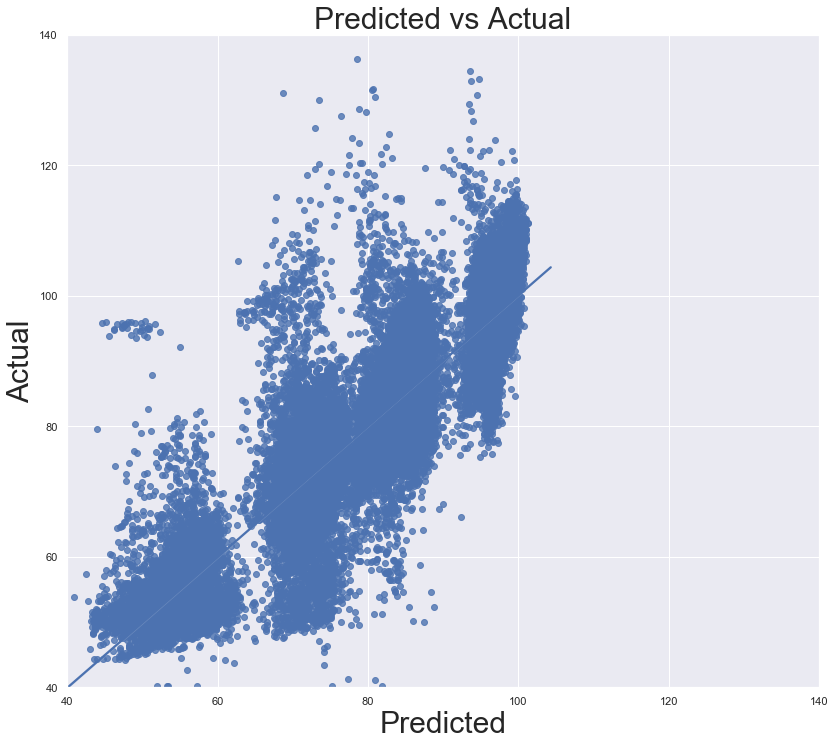

In [53]:
sns.set(rc={'figure.figsize':(12,12)})
ax=sns.regplot(x=y_pred,y=y_test, data=prediction_df)
ax.set_xlabel('Predicted',fontsize=30)
ax.set_ylabel('Actual',fontsize=30)
ax.set_title('Predicted vs Actual',fontsize=30)
plt.ylim(40, 140)
plt.xlim(40, 140)

In [54]:
logs['predicted_curve']=linreg.predict(X)

In [55]:
logs.head()

,Observation_Num,UWI_PROXY,depth,curve1,curve2,curve3,curve4,curve5,target_log,curve1_diff,...,Roll20_curve1_diff_2nd,Roll20_curve1,Ln_curve3,Cluster,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,predicted_curve
21,22,uwi1,7510.5,71.005,0.002,1.855,0.352,2.616,50.000,0.451,...,0.999059,5.795630,0.617885,4.0,0.0,0.0,0.0,0.0,1.0,87.528231
22,23,uwi1,7511.0,70.049,0.005,1.844,0.355,2.578,80.958,0.956,...,0.969979,5.733276,0.611937,4.0,0.0,0.0,0.0,0.0,1.0,88.009402
23,24,uwi1,7511.5,67.642,0.024,1.844,0.358,2.566,93.694,2.407,...,0.885825,5.606104,0.611937,4.0,0.0,0.0,0.0,0.0,1.0,88.198446
24,25,uwi1,7512.0,66.297,0.000,1.843,0.361,2.574,85.435,1.345,...,0.824823,5.272441,0.611395,4.0,0.0,0.0,0.0,0.0,1.0,88.186199
25,26,uwi1,7512.5,66.074,0.001,1.856,0.364,2.582,69.069,0.223,...,0.816285,5.031000,0.618424,4.0,0.0,0.0,0.0,0.0,1.0,88.160144


(40, 140)

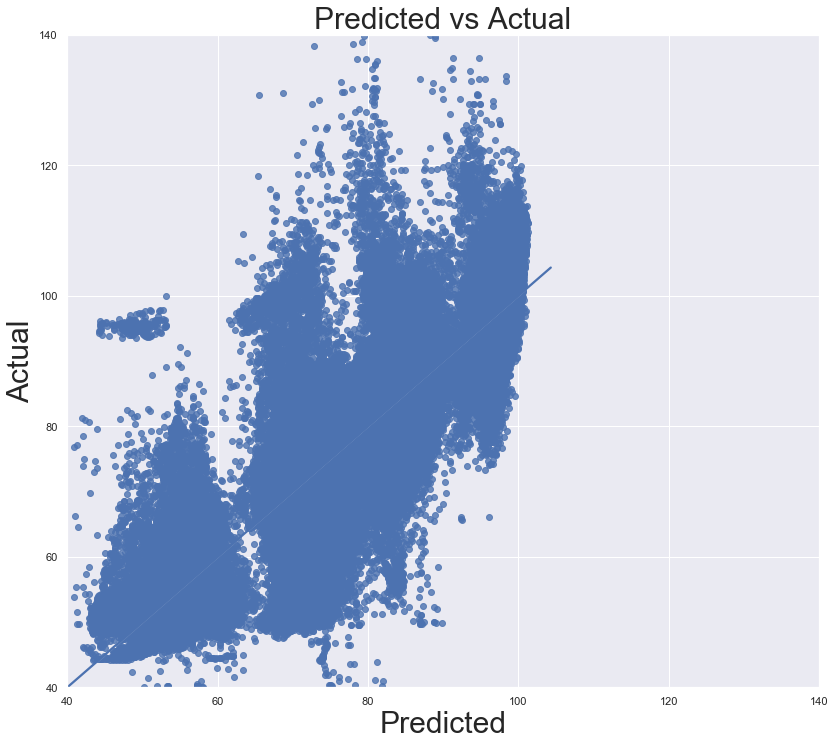

In [57]:
#Plot actual vs. predicted for the entire dataset
ax=sns.regplot(x='predicted_curve',y='target_log', data=logs)
ax.set_xlabel('Predicted',fontsize=30)
ax.set_ylabel('Actual',fontsize=30)
ax.set_title('Predicted vs Actual',fontsize=30)
plt.ylim(40, 140)
plt.xlim(40, 140)

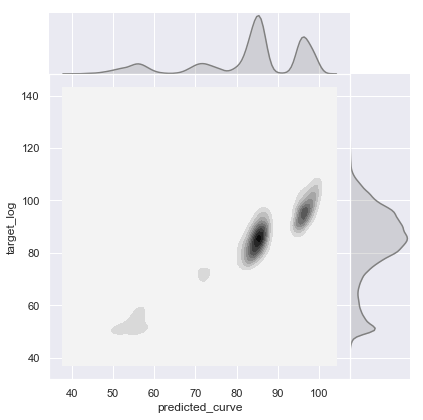

In [61]:
### Plot scatter data but get a sense for data density
sns.set(rc={'figure.figsize':(12,12)})
ax=sns.jointplot(x='predicted_curve',y='target_log', data=logs, kind='kde',color='grey', space=0)

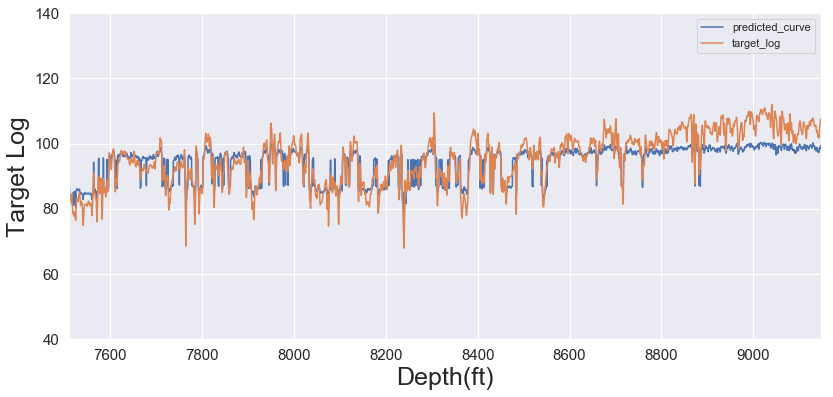

In [98]:
logs_to_plot=logs.loc[(logs['UWI_PROXY']=='uwi71')&(logs['depth']>0)]
logs.head()
ax=logs_to_plot.plot(x='depth',y=['predicted_curve','target_log'],figsize=(12,6),grid=True)
ax=plt.ylim(40, 140)
ax=plt.xlabel('Depth(ft)',fontsize=25)
ax=plt.ylabel('Target Log',fontsize=25)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)